In [26]:
import pandas as pd
import seaborn as sns
df = pd.read_excel('../data_sample/data.xlsx').iloc[:, :-1]
df

,index,track_name,artist_name,top_artist,artist_popularity,followers,album_name,format,duration_s,release_date,...,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,0,PIToRRO DE COCO,Bad Bunny,Bad Bunny,100,94364002,PIToRRO DE COCO,single,206627,2024-12-26,...,2024,98,67,64,-5,12,54,207,25,3
1,1,Terciopelo,Natos y Waor,Natos y Waor,65,859707,Terciopelo,single,133902,2017-03-17,...,2017,92,75,45,-6,14,31,134,34,44
2,2,Un Plan,"Dímelo Flow, Zion & Lennox, Beéle, Jerry Di",Dímelo Flow,70,573351,Always Dream,album,204146,2022-06-09,...,2022,172,82,77,-4,9,59,204,14,7
3,3,PASAJERO,Mora,Mora,81,7154775,ESTRELLA,album,149538,2023-08-28,...,2023,130,67,75,-6,8,34,150,48,4
4,4,Shooters,"Israel B, LOWLIGHT",Israel B,55,82608,Shooters,single,12975,2020-10-29,...,2020,174,45,60,-12,37,15,130,24,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,6563,Pelé,"KG970, Elpatron970",KG970,54,187696,Pelé,single,162206,2022-06-17,...,2022,145,69,74,-7,13,76,162,54,19
6451,6564,El Bolero,"Yami Safdie, Milo j",Yami Safdie,72,504681,Dije Que No Me Iba a Enamorar,album,206146,2022-11-16,...,2022,115,30,80,-10,13,70,206,72,4
6452,6565,Primaveras en Diciembre,"Nachodowntempo, Sharif",Nachodowntempo,24,2006,Zaragozatools,album,203213,2016-05-27,...,2016,85,86,64,-5,34,32,203,42,13
6453,6566,VIRGENSITA,"Elio Toffana, Cruz Cafuné",Elio Toffana,45,41249,SHOCK WAVE,album,210733,2022-12-15,...,2022,154,68,78,-7,12,60,211,18,15


In [101]:
df.year.value_counts(True)[:11]

year
2020    0.143300
2022    0.136793
2021    0.132765
2023    0.131836
2019    0.105345
2024    0.092641
2018    0.078079
2017    0.051588
2016    0.037335
2015    0.019365
2025    0.014872
Name: proportion, dtype: float64

<Axes: xlabel='popularity', ylabel='Count'>

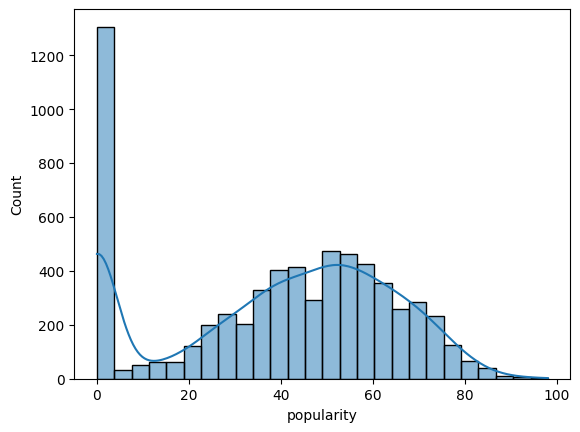

In [27]:
sns.histplot(x= "popularity", data = df, kde = True)

##### Todos los datos, corr > 0.085

In [ ]:
# Convertir variables binarias a numéricas
for col in ["explicit", "colab", "format"]:
    df[col] = df[col].astype(str).str.lower().map({"true": 1, "false": 0, "album": 0, "single": 1})

# Procesar 'top genre'
top_genres = df["top genre"].value_counts().head(5).index
df["top_genre_grouped"] = df["top genre"].apply(lambda x: x if x in top_genres else "otros")
df = pd.get_dummies(df, columns=["top_genre_grouped"], drop_first=True)

# Eliminar columnas no necesarias
cols_to_drop = ['track_name', 'artist_name', 'top_artist', 'album_name', 'genres', 'top genre', 'release_date']
df.drop(columns=cols_to_drop, inplace=True)

# Calcular correlaciones con la target
correlation_table = df.corr(numeric_only=True)["popularity"].sort_values(ascending=False)
print("Correlaciones con la popularidad:\n")
print(correlation_table)


Correlaciones con la popularidad:

popularity                          1.000000
artist_popularity                   0.537851
followers                           0.374442
top_genre_grouped_reggaetón         0.285898
dB                                  0.229671
year                                0.089663
val                                 0.083240
nrgy                                0.071863
top_genre_grouped_trap argentino    0.062476
dnce                                0.062152
top_genre_grouped_urbano latino     0.057303
dur                                 0.051970
bpm                                 0.047890
duration_s                          0.028574
colab                               0.027882
explicit                            0.027579
index                               0.011852
live                                0.008882
top_genre_grouped_trap latino       0.001549
acous                              -0.141392
format                             -0.165042
spch                

<Axes: xlabel='followers', ylabel='popularity'>

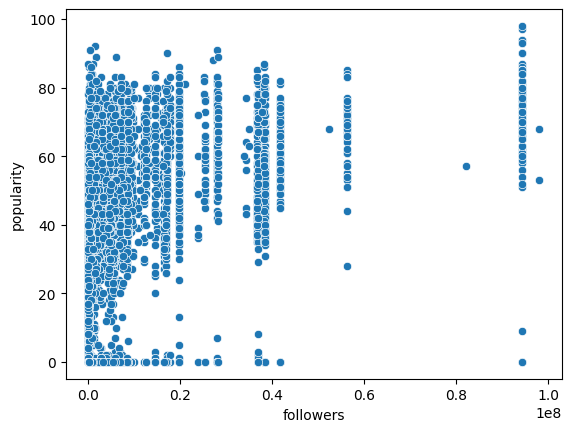

In [29]:
sns.scatterplot(data=df, x='followers', y='popularity')


In [30]:
from scipy.stats import pearsonr

# Variables numéricas (excluyendo la target para ahora)
numeric_cols = df.select_dtypes(include='number').columns.drop('popularity')

# Crear tabla con correlaciones y p-valores
correlation_results = []

for col in numeric_cols:
    corr, p = pearsonr(df[col], df['popularity'])
    correlation_results.append({
        'feature': col,
        'correlation': corr,
        'p_value': p
    })

# Convertir a DataFrame y ordenarlo
correlation_df = pd.DataFrame(correlation_results).sort_values(by='correlation', ascending=False)
print(correlation_df)


              feature  correlation        p_value
1   artist_popularity     0.537851   0.000000e+00
2           followers     0.374442  5.560103e-214
11                 dB     0.229671   5.010137e-78
7                year     0.089663   5.316331e-13
13                val     0.083240   2.111188e-11
9                nrgy     0.071863   7.467065e-09
10               dnce     0.062152   5.813338e-07
14                dur     0.051970   2.948411e-05
8                 bpm     0.047890   1.185611e-04
4          duration_s     0.028574   2.169098e-02
6               colab     0.027882   2.508459e-02
5            explicit     0.027579   2.670653e-02
0               index     0.011852   3.410469e-01
12               live     0.008882   4.755367e-01
15              acous    -0.141392   3.518743e-30
3              format    -0.165042   1.199517e-40
16               spch    -0.179375   8.210990e-48


<Axes: xlabel='dur', ylabel='popularity'>

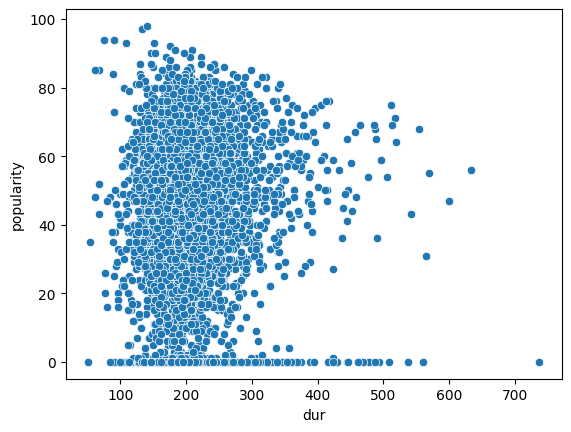

In [31]:
import seaborn as sns
sns.scatterplot(data=df, x='dur', y='popularity')
# no la vamos a incluir

In [76]:
# estas son las variables que usarmoes, al menos a priori
features = correlation_table[abs(correlation_table.values) > 0.085].keys()

In [77]:
features

Index(['popularity', 'artist_popularity', 'followers',
       'top_genre_grouped_reggaetón', 'dB', 'year', 'acous', 'format', 'spch',
       'top_genre_grouped_otros'],
      dtype='object')

In [78]:
# vamos a trabajar con el df que teníamos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Elegir variables predictoras y target
target = 'popularity'

X = df[features]
y = df[target]

# 2. Dividir entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Escalado SOLO para Regresión Lineal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

model_names = ["Regresion Lineal","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LinearRegression()
tree_clf = DecisionTreeRegressor(random_state= 42)
rf_clf = RandomForestRegressor(random_state= 42)
xgb_clf = XGBRegressor(random_state = 42)
lgb_clf = LGBMRegressor(random_state= 42, verbose = -100)
cat_clf = CatBoostRegressor(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]


In [79]:
from sklearn.model_selection import cross_val_score
import numpy as np

metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(f"Evaluando modelo: {nombre}")
    
    if nombre == "Regresion Lineal":
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')
    else:
        scores = cross_val_score(modelo, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    
    metricas_cv[nombre] = scores
    valores.append(np.mean(scores))  # Guardamos la media del score

# Mostrar resultados
for model_name, score in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(score)):.2f}")

ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"\n🏆 El modelo ganador es: {ganador}")


Evaluando modelo: Regresion Lineal
Evaluando modelo: DecisionTree
Evaluando modelo: Random Forest
Evaluando modelo: XGBoost
Evaluando modelo: LightGBM
Evaluando modelo: CatBoost
Model <Regresion Lineal>, RMSE_CV: 0.00
Model <DecisionTree>, RMSE_CV: 0.10
Model <Random Forest>, RMSE_CV: 0.10
Model <XGBoost>, RMSE_CV: 0.08
Model <LightGBM>, RMSE_CV: 0.31
Model <CatBoost>, RMSE_CV: 0.24

🏆 El modelo ganador es: Regresion Lineal


In [80]:
from sklearn.metrics import mean_squared_error

# Contra test el mejor:
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"🔍 RMSE en test: {rmse_test:.10f}")


🔍 RMSE en test: 0.0000000000


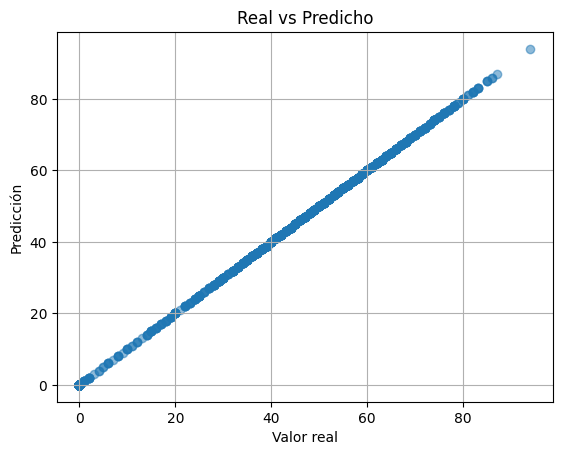

In [81]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Real vs Predicho")
plt.grid()
plt.show()


In [82]:
from sklearn.metrics import mean_squared_error

# Contra test el mejor:
best_model = XGBRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"🔍 RMSE en test: {rmse_test:.10f}")


🔍 RMSE en test: 0.0088003553


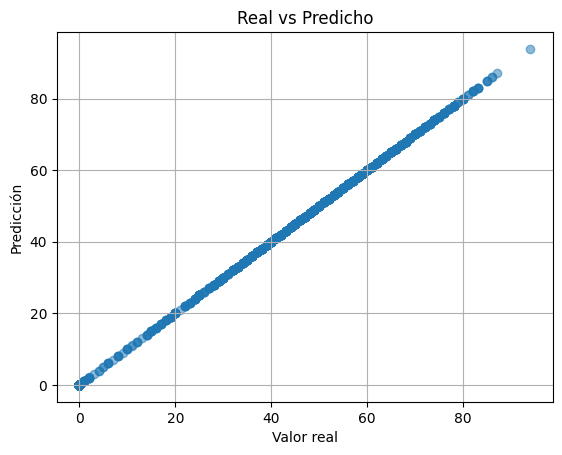

In [83]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Real vs Predicho")
plt.grid()
plt.show()


##### Sin popularidad 0, corr > 0.05 | corr < -0.01

In [36]:
# aun así, probaremos las métricas quitando las de popularity cero, porque sospechamos que algunas no son correctas
df_wo_zero = pd.read_excel('../data_sample/data.xlsx').iloc[:, :-1]
df_wo_zero = df_wo_zero[df_wo_zero['popularity'] > 0].copy()


In [37]:
# Convertir variables binarias a numéricas
for col in ["explicit", "colab", "format"]:
    df_wo_zero[col] = df_wo_zero[col].astype(str).str.lower().map({"true": 1, "false": 0, "album": 0, "single": 1})

# Procesar 'top genre'
top_genres = df_wo_zero["top genre"].value_counts().head(5).index
df_wo_zero["top_genre_grouped"] = df_wo_zero["top genre"].apply(lambda x: x if x in top_genres else "otros")
df_wo_zero = pd.get_dummies(df_wo_zero, columns=["top_genre_grouped"], drop_first=True)

# Eliminar columnas no necesarias
cols_to_drop = ['track_name', 'artist_name', 'top_artist', 'album_name', 'genres', 'top genre', 'release_date']
df_wo_zero.drop(columns=cols_to_drop, inplace=True)

# Calcular correlaciones con la target
correlation_table = df_wo_zero.corr(numeric_only=True)["popularity"].sort_values(ascending=False)
print("Correlaciones con la popularidad:\n")
print(correlation_table)


Correlaciones con la popularidad:

popularity                          1.000000
artist_popularity                   0.558689
followers                           0.391903
top_genre_grouped_reggaetón         0.213998
dB                                  0.130140
dur                                 0.100330
top_genre_grouped_trap argentino    0.089224
duration_s                          0.058635
top_genre_grouped_urbano latino     0.038548
nrgy                                0.036655
dnce                                0.035191
val                                 0.027202
explicit                            0.025316
bpm                                 0.022206
index                               0.010780
live                                0.006663
colab                              -0.006811
year                               -0.018050
acous                              -0.036670
top_genre_grouped_trap latino      -0.067937
format                             -0.094710
spch                

In [38]:
from scipy.stats import pearsonr

# Variables numéricas (excluyendo la target para ahora)
numeric_cols = df_wo_zero.select_dtypes(include='number').columns.drop('popularity')

# Crear tabla con correlaciones y p-valores
correlation_results = []

for col in numeric_cols:
    corr, p = pearsonr(df_wo_zero[col], df_wo_zero['popularity'])
    correlation_results.append({
        'feature': col,
        'correlation': corr,
        'p_value': p
    })

# Convertir a DataFrame y ordenarlo
correlation_df_wo_zero = pd.DataFrame(correlation_results).sort_values(by='correlation', ascending=False)
print(correlation_df_wo_zero)


              feature  correlation        p_value
1   artist_popularity     0.558689   0.000000e+00
2           followers     0.391903  2.318636e-191
11                 dB     0.130140   3.585124e-21
14                dur     0.100330   3.642518e-13
4          duration_s     0.058635   2.228794e-05
9                nrgy     0.036655   8.058943e-03
10               dnce     0.035191   1.096893e-02
13                val     0.027202   4.929859e-02
5            explicit     0.025316   6.730502e-02
8                 bpm     0.022206   1.085359e-01
0               index     0.010780   4.359745e-01
12               live     0.006663   6.301989e-01
6               colab    -0.006811   6.226241e-01
7                year    -0.018050   1.920927e-01
15              acous    -0.036670   8.032903e-03
3              format    -0.094710   6.928160e-12
16               spch    -0.112330   3.864883e-16


In [ ]:
# estas son las variables que usarmoes, al menos a priori
features_w_z = correlation_table[(correlation_table.values > 0.05) | (correlation_table.values < -0.01)].keys()
features_w_z

Index(['popularity', 'artist_popularity', 'followers',
       'top_genre_grouped_reggaetón', 'dB', 'dur',
       'top_genre_grouped_trap argentino', 'duration_s', 'year', 'acous',
       'top_genre_grouped_trap latino', 'format', 'spch',
       'top_genre_grouped_otros'],
      dtype='object')

In [41]:
df_wo_zero

,index,artist_popularity,followers,format,duration_s,popularity,explicit,colab,year,bpm,...,live,val,dur,acous,spch,top_genre_grouped_otros,top_genre_grouped_reggaetón,top_genre_grouped_trap argentino,top_genre_grouped_trap latino,top_genre_grouped_urbano latino
0,0,100,94364002,1,206627,65,0,0,2024,98,...,12,54,207,25,3,False,True,False,False,False
2,2,70,573351,0,204146,27,1,1,2022,172,...,9,59,204,14,7,False,True,False,False,False
3,3,81,7154775,0,149538,66,0,0,2023,130,...,8,34,150,48,4,False,False,False,False,True
4,4,55,82608,1,12975,42,1,1,2020,174,...,37,15,130,24,21,True,False,False,False,False
7,7,53,25134,1,20418,53,1,1,2020,176,...,23,42,204,18,8,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,6562,57,252744,0,173573,41,0,0,2024,150,...,10,39,174,2,7,True,False,False,False,False
6451,6564,72,504681,0,206146,77,0,1,2022,115,...,13,70,206,72,4,False,False,True,False,False
6452,6565,24,2006,0,203213,40,0,1,2016,85,...,34,32,203,42,13,True,False,False,False,False
6453,6566,45,41249,0,210733,46,1,1,2022,154,...,12,60,211,18,15,True,False,False,False,False


In [40]:
X = df_wo_zero[features_w_z]
y = df_wo_zero[target]

# 2. Dividir entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Escalado SOLO para Regresión Lineal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(f"Evaluando modelo: {nombre}")
    
    if nombre == "Regresion Lineal":
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')
    else:
        scores = cross_val_score(modelo, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    
    metricas_cv[nombre] = scores
    valores.append(np.mean(scores))  # Guardamos la media del score

# Mostrar resultados
for model_name, score in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(score)):.2f}")

ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"\n🏆 El modelo ganador es: {ganador}")


Evaluando modelo: Regresion Lineal
Evaluando modelo: DecisionTree
Evaluando modelo: Random Forest
Evaluando modelo: XGBoost
Evaluando modelo: LightGBM
Evaluando modelo: CatBoost
Model <Regresion Lineal>, RMSE_CV: 0.00
Model <DecisionTree>, RMSE_CV: 0.18
Model <Random Forest>, RMSE_CV: 0.13
Model <XGBoost>, RMSE_CV: 0.13
Model <LightGBM>, RMSE_CV: 0.32
Model <CatBoost>, RMSE_CV: 0.22

🏆 El modelo ganador es: Regresion Lineal


In [ ]:
from sklearn.metrics import mean_squared_error

# Contra test el segundo mejor:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"🔍 RMSE en test: {rmse_test:.2f}")


🔍 RMSE en test: 0.03


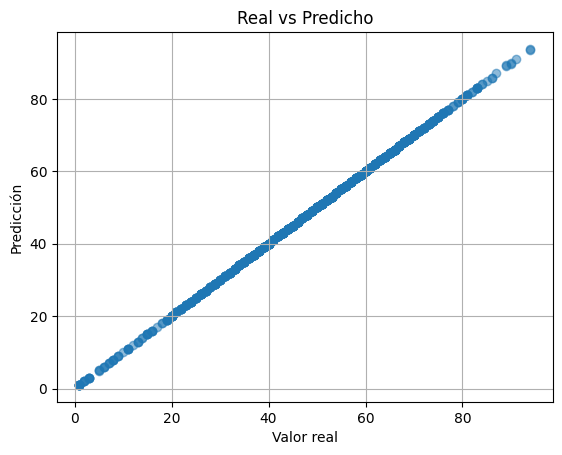

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Real vs Predicho")
plt.grid()
plt.show()


##### Todos los datos, corr > 0.05

In [ ]:
correlation_table = df.corr(numeric_only=True)["popularity"].sort_values(ascending=False)
print("Correlaciones con la popularidad:\n")
print(correlation_table)

Correlaciones con la popularidad:

popularity                          1.000000
artist_popularity                   0.537851
followers                           0.374442
top_genre_grouped_reggaetón         0.285898
dB                                  0.229671
year                                0.089663
val                                 0.083240
nrgy                                0.071863
top_genre_grouped_trap argentino    0.062476
dnce                                0.062152
top_genre_grouped_urbano latino     0.057303
dur                                 0.051970
bpm                                 0.047890
duration_s                          0.028574
colab                               0.027882
explicit                            0.027579
index                               0.011852
live                                0.008882
top_genre_grouped_trap latino       0.001549
acous                              -0.141392
format                             -0.165042
spch                

In [85]:
# estas son las variables que usarmoes, al menos a priori
features = correlation_table[abs(correlation_table.values) > 0.06].keys()

In [86]:
features

Index(['popularity', 'artist_popularity', 'followers',
       'top_genre_grouped_reggaetón', 'dB', 'year', 'val', 'nrgy',
       'top_genre_grouped_trap argentino', 'dnce', 'acous', 'format', 'spch',
       'top_genre_grouped_otros'],
      dtype='object')

In [87]:
# vamos a trabajar con el df que teníamos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Elegir variables predictoras y target
target = 'popularity'

X = df[features]
y = df[target]

# 2. Dividir entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Escalado SOLO para Regresión Lineal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

model_names = ["Regresion Lineal","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LinearRegression()
tree_clf = DecisionTreeRegressor(random_state= 42)
rf_clf = RandomForestRegressor(random_state= 42)
xgb_clf = XGBRegressor(random_state = 42)
lgb_clf = LGBMRegressor(random_state= 42, verbose = -100)
cat_clf = CatBoostRegressor(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]


In [89]:
from sklearn.model_selection import cross_val_score
import numpy as np

metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(f"Evaluando modelo: {nombre}")
    
    if nombre == "Regresion Lineal":
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    else:
        scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    metricas_cv[nombre] = scores
    valores.append(np.mean(scores))  # Guardamos la media del score

# Mostrar resultados
for model_name, score in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(score)):.2f}")

ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"\n🏆 El modelo ganador es: {ganador}")


Evaluando modelo: Regresion Lineal
Evaluando modelo: DecisionTree
Evaluando modelo: Random Forest
Evaluando modelo: XGBoost
Evaluando modelo: LightGBM
Evaluando modelo: CatBoost
Model <Regresion Lineal>, RMSE_CV: 0.00
Model <DecisionTree>, RMSE_CV: 0.19
Model <Random Forest>, RMSE_CV: 0.07
Model <XGBoost>, RMSE_CV: 0.06
Model <LightGBM>, RMSE_CV: 0.29
Model <CatBoost>, RMSE_CV: 0.21

🏆 El modelo ganador es: Regresion Lineal


In [90]:
from sklearn.metrics import mean_squared_error

# Contra test el mejor:
best_model = XGBRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"🔍 RMSE en test: {rmse_test:.10f}")


🔍 RMSE en test: 0.0139523172


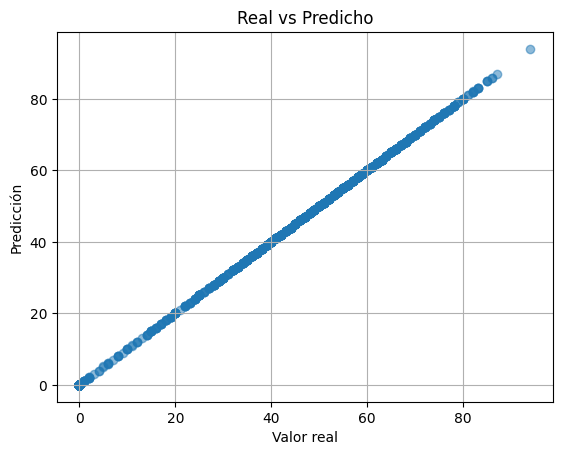

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Real vs Predicho")
plt.grid()
plt.show()
